Name: Utsa Poddar
UCID: 30071131

Using the Curve fitting using scipy.optimize package method for all four gases, the value for eplison(ɛ) and sigma(σ) was determined for PART a

In [ ]:
import matplotlib.pylab as plt
import math
import numpy as np
from scipy.optimize import minimize, curve_fit

#function defining the potential energy function
def potential_energy (r,param):
  #storing the value of the values of epsilon and sigma in a single parameter 
  epsilon, sigma=param
  #formula for the Lennard-Jones potential energy
  U=4*(epsilon)*(((sigma/r)**12)-(sigma/r)**6)
  return U

#function generating the y values for the model
def lines(x_points, model, params):
  #list to store the values of the generated y values
  model_list=[]
  #iterating through the list to get each each y value
  for x in x_points:
    #generating the value of y using the x value of the list
    y_model=model(x,params)
    #adding the value of y to the appropriate list
    model_list.append(y_model)
  return model_list

#function to determine the value of reduced chi squared
def reduced_chi_squared(expected,observed,uncertainty=1):
  chi_squared=0

  #expected=y_points (from the input file)
  #observed=model_list (from the function "lines")
  #putting the observed and expected values into a dictionary which will help to determine all the chi_squared values to add them up
  dict_y=dict(zip(observed,expected))
  #iterating through the dictionary to subtract the keys and values to get the value of chi squared 
  for i in dict_y:
    #updating the value of chi squared as each value of chi is determined and then added
    chi_squared+=(i-dict_y[i])**2
  #determining the N value
  N=len(dict_y)
  #determing the reduced chi squared value
  reducedchisquared=chi_squared/N
  return reducedchisquared

#opening all the required files
files = ["potential_He2_QM.txt","potential_Ar2_QM.txt","potential_Ne2_QM.txt","potential_Kr2_QM.txt"]
#making a list for all the guesses of epsilon and sigma 
guesses =[(2,100), (2,30000), (2, 900),(2, 100000)]

#A list for the values of epsilon and sigma to be stored
#this list will be used later for PART b
epsilon_sigma=[]


#iteraring through all the files to generate graphs for each case
for i in range(len(files)):
  #lists for the x and y values from the data set
  x_points = []
  y_points = []
  #opening the file and reading off the x and y values
  with open(files[i], "r") as file_open:
    #formatting the read values
    for pair in file_open:
      x, y = pair.replace("\n","").split()
      x, y = float(x), float(y)
      #putting the read x and y values in their respective lists
      x_points.append(x)
      y_points.append(y)
      
  #function to determine the value of reduced chi squared
  def chi2_of_model(params):
    return reduced_chi_squared(y_points, lines(x_points, potential_energy, params))
  #using the scipy.optimize.minimize to optimize the parameters 
  solution=minimize(chi2_of_model, guesses[i], method='Nelder-Mead')
  #getting the optimized line
  min_line = lines(x_points, potential_energy, solution.x)

  #here solution.x[0]=epsilon and solution.x[1]=sigma
  #printing the values of epsilon and sigma for each gas
  #moreover adding the value of epsilon and sigma into the appropriate list
  if files[i] == "potential_He2_QM.txt":
    print("In the He2 case the value for epsilon is %.4fmeV and the sigma is %.4fÅ" %(solution.x[0],solution.x[1]))
    epsilon_sigma.append(solution.x)
  if files[i] == "potential_Ar2_QM.txt":
    print("In the Ar2 case the value for epsilon is %.4fmeV and the sigma is %.4fÅ" %(solution.x[0],solution.x[1]))
    epsilon_sigma.append(solution.x)
  if files[i] == "potential_Ne2_QM.txt":
    print("In the Ne2 case the value for epsilon is %.4fmeV and the sigma is %.4fÅ" %(solution.x[0],solution.x[1]))
    epsilon_sigma.append(solution.x)
  if files[i] == "potential_Kr2_QM.txt":
    print("In the Kr2 case the value for epsilon is %.4fmeV and the sigma is %.4fÅ" %(solution.x[0],solution.x[1]))
    epsilon_sigma.append(solution.x)

In the He2 case the value for epsilon is 4.7373meV and the sigma is 2.4059Å
In the Ar2 case the value for epsilon is 8.0558meV and the sigma is 3.5758Å
In the Ne2 case the value for epsilon is 2.3691meV and the sigma is 2.9658Å
In the Kr2 case the value for epsilon is 4.5319meV and the sigma is 4.1471Å


As mentioned above in the generated output the set of (ɛ, σ) for each case, Helium, Argon, Nelon and Krypton are (4.7373meV, 2.4059Å), (8.0558meV, 3.5758Å), (2.3691meV, 2.9658Å) and (4.5319meV, 4.1471Å) respectively.

FE1
To start off the potential energy function is introduced which returns the value of U (potential energy) when the parameters r, epsilon and sigma are provided. The formula for U was given in the question for the Final assignment. Next another function is created which returns a list by using the potential function, essentially, we can provide a list of values of x (r in this case, as r is in the x axis) along the model function (potential function) and its parameters, and the function will give us a list of y values (U in this case, as the U is in the y axis). Then the function for reduced chi squared is provided which uses a dictionary to find the difference between it keys (observed) and values (expected) to determine the chi squared values and add them up according to the formula from Assignment 5. The reduced chi squared is determined by diving the total chi squared by the total number of observations.
Then the file names are provided in a list called “files” which will be used later to open the files, and the then the guess values are provided which will be used to determine the solution. Another list named “epsilon_sigma” is introduced which will be used for part b. Next, a for loop iterates through the file and each one is open to perform the following operations: a list for x points is created(r) and another list for y points (U) is created. The file is opened, and the lines are formatted and converted into floats to be stored as x and y points which are added to their respective lists.
Next another function is introduced (chi2 of model) which passes the results from the “lines” functions, and y points into the reduced chi squared function. This function is then used to determine the slotion to the potential using the scipy.optimize.minimize method. The line with the minimum reduced chi squared is defined to be min line. For the solution for all the files are printed out as the values of epsilon and sigma are presented.

PART b

Used the Newton Raphson method to determine the minimum potential and the equilibrium seperation.

For Helium the equilibrium seperation is 2.7006Å with the potential minimum at -4.7373meV.
The number of steps required for Helium: 8
For Argon the equilibrium seperation is 4.0137Å with the potential minimum at -8.0558meV.
The number of steps required for Argon: 14
For Neon the equilibrium seperation is 3.3290Å with the potential minimum at -2.3691meV.
The number of steps required for Neon: 11
For Krypton the equilibrium seperation is 4.6550Å with the potential minimum at -4.5319meV.
The number of steps required for Krypton: 16


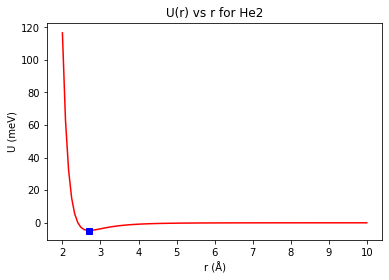

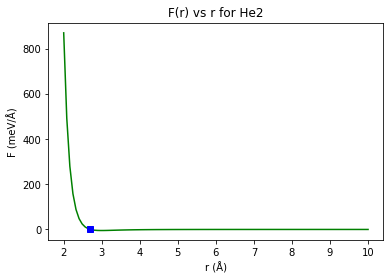

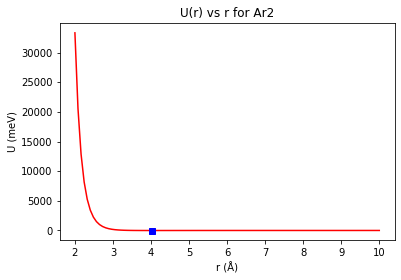

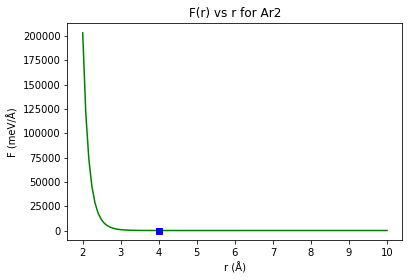

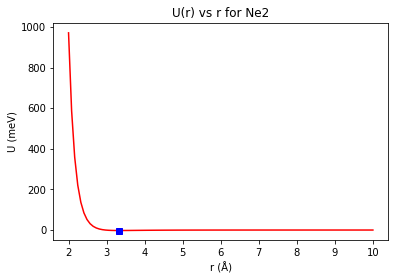

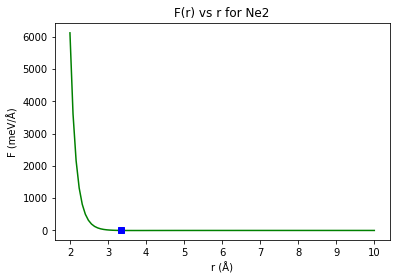

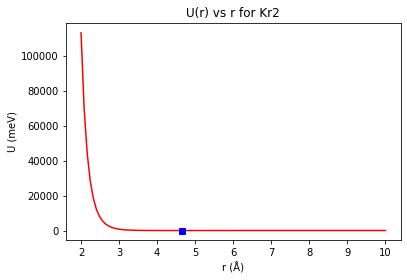

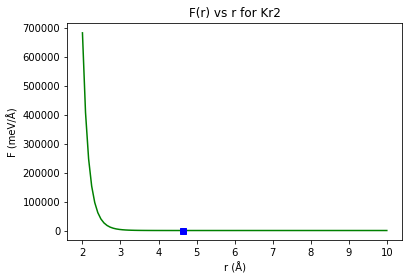

In [ ]:
import matplotlib.pylab as plt
import math
import numpy as np

#function defining the potential energy function
def potential_energy (r,param):
  #storing the value of the values of epsilon and sigma in a single parameter
  epsilon, sigma=param
  #formula for the Lennard-Jones potential energy
  U=4*(epsilon)*(((sigma/r)**12)-(sigma/r)**6)
  return U

#function defining the force function
def force (r,param):
  #determined formula for the force (-dU/dr)
  F=-4*epsilon * ( sigma**12 * (-12)*r**(-13)  - sigma**6 * (-6)*r**(-7)  )
  return F

#function defining second derivative of the potential energy function
def d2U (r, param):
  #determined formula for the second derivative of U
  d2U=4*epsilon * ( sigma**12 * (-12)*(-13)*r**(-14) - sigma**6 * (-6)*(-7)*r**(-8) )
  return d2U
#the tolarance value for the Newton Raphson method  
tol=1e-4

#the range of values of r for which the graphs are ploted
r = np.linspace(2,10,100)
#iterating for each case of gas with different epsilon ans sigma values
for i in range(len(epsilon_sigma)):
  #determing the epsilon value for the current case from the generated list
  epsilon=list(epsilon_sigma[i])[0]
  #determing the sigma values for the current case from the generated list
  sigma=list(epsilon_sigma[i])[1]
  #putting both the values in a single parameter
  param=epsilon,sigma
  #generating the U values for the values of r
  Uline=potential_energy(r,param)
  #generating the F values for the values of r
  Fline=force(r,param)

  #initializing the value of r to find the minimum
  r0=2
  #initializing the variable to count the steps  
  nstep=0
  #initializing a list for the r values until the minimum U 
  list_r=[r0]
  #initializing a list for the U values until the minimum U 
  list_U=[potential_energy(r0,param)]
  #initializing a list for the F values until the minimum U 
  list_f=[force(r0,param)]

  #using the NR method to get to the minimum value
  while abs(force(r0,param))>tol:
    #counting the number of steps
    nstep=nstep+1
    #formula for NR
    r0=r0+(force(r0,param)/d2U(r0,param))
    
    #adding the values of r to the appropriate list
    list_r.append(r0)
    #adding the values of U to the appropriate list
    list_U.append(potential_energy(r0,param))
    #adding the values of F to the appropriate list
    list_f.append(force(r0,param))

  #ploting the current figure
  plt.figure()
  #ploting the U vs r graph for the current gas
  plt.plot(r,Uline,'r')
  #ploting the scatter plots from the NR method
  plt.plot(list_r[len(list_r)-1],list_U[len(list_U)-1],'bs--')
  if i == 0:
    #giving the appropriate title, axis labels with units
    plt.title("U(r) vs r for He2")
    plt.xlabel("r (Å)")
    plt.ylabel("U (meV)")
    plt.figure()
    #ploting the F vs r graph for the current gas
    plt.plot(r,Fline,'g')
    #ploting the scatter point from the NR method
    plt.plot(list_r[len(list_r)-1],list_f[len(list_f)-1],'bs--')
    #giving the appropriate title, axis labels with units
    plt.title("F(r) vs r for He2")
    plt.xlabel("r (Å)")
    plt.ylabel("F (meV/Å)")
    print("For Helium the equilibrium seperation is %.4fÅ with the potential minimum at %.4fmeV." %(r0,potential_energy(r0,param)))
    print("The number of steps required for Helium:",nstep )
  if i == 1:
    #giving the appropriate title, axis labels with units
    plt.title("U(r) vs r for Ar2")
    plt.xlabel("r (Å)")
    plt.ylabel("U (meV)")
    plt.figure()
    #ploting the F vs r graph for the current gas
    plt.plot(r,Fline,'g')
    #ploting the scatter point from the NR method
    plt.plot(list_r[len(list_r)-1],list_f[len(list_f)-1],'bs--')
    #giving the appropriate title, axis labels with units
    plt.title("F(r) vs r for Ar2")
    plt.xlabel("r (Å)")
    plt.ylabel("F (meV/Å)")
    print("For Argon the equilibrium seperation is %.4fÅ with the potential minimum at %.4fmeV." %(r0,potential_energy(r0,param)))
    print("The number of steps required for Argon:",nstep )
  if i == 2:
    #giving the appropriate title, axis labels with units
    plt.title("U(r) vs r for Ne2")
    plt.xlabel("r (Å)")
    plt.ylabel("U (meV)")
    plt.figure()
    #ploting the F vs r graph for the current gas
    plt.plot(r,Fline,'g')
    #ploting the scatter point from the NR method
    plt.plot(list_r[len(list_r)-1],list_f[len(list_f)-1],'bs--')
    #giving the appropriate title, axis labels with units
    plt.title("F(r) vs r for Ne2")
    plt.xlabel("r (Å)")
    plt.ylabel("F (meV/Å)")
    print("For Neon the equilibrium seperation is %.4fÅ with the potential minimum at %.4fmeV." %(r0,potential_energy(r0,param)))
    print("The number of steps required for Neon:",nstep )
  if i == 3:
    #giving the appropriate title, axis labels with units
    plt.title("U(r) vs r for Kr2")
    plt.xlabel("r (Å)")
    plt.ylabel("U (meV)")
    plt.figure()
    #ploting the F vs r graph for the current gas
    plt.plot(r,Fline,'g')
    #ploting the scatter point from the NR method
    plt.plot(list_r[len(list_r)-1],list_f[len(list_f)-1],'bs--')
    #giving the appropriate title, axis labels with units
    plt.title("F(r) vs r for Kr2")
    plt.xlabel("r (Å)")
    plt.ylabel("F (meV/Å)")
    print("For Krypton the equilibrium seperation is %.4fÅ with the potential minimum at %.4fmeV." %(r0,potential_energy(r0,param)))
    print("The number of steps required for Krypton:",nstep )

plt.show()

As mentioned above the characterizing quantities (equilibrium seperation, minimum potential) for Helium, Argon, Neon and Krypton are (2.7006Å, -4.7373meV), (4.0137Å, -8.0558meV), (3.3290Å, -2.3691meV) and (4.6550Å, -4.5319meV) respectively. The number of steps taken to generate the output is also printed in the output; 8, 14, 11 and 16 for Helium, Argon, Neon and Krypton respectively.

For part b Newton Raphson method is used to determine the values of the minimum potential and equilibrium seperation. To determine F, F=-dU/dr was used and implemented into the function called force. Similarly, the second derivative was implemented in the function d2U. The tolerance value was set to be 1e-4. Next the vector for r was created, and the list (epsilon_sigma) determined in part a is used to iterated through and the values of epsilon and sigma are determined for every case, as well the list for potential energy and force. Next lists were created to determine the minimum value of U and F. Then the NR method was used to determine the value for the minimum potential and force using a while loop. Lastly the F vs and U vs r figures for each gas were plotted with proper title, axis labels and units.